# Tensorflow

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [5]:
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt

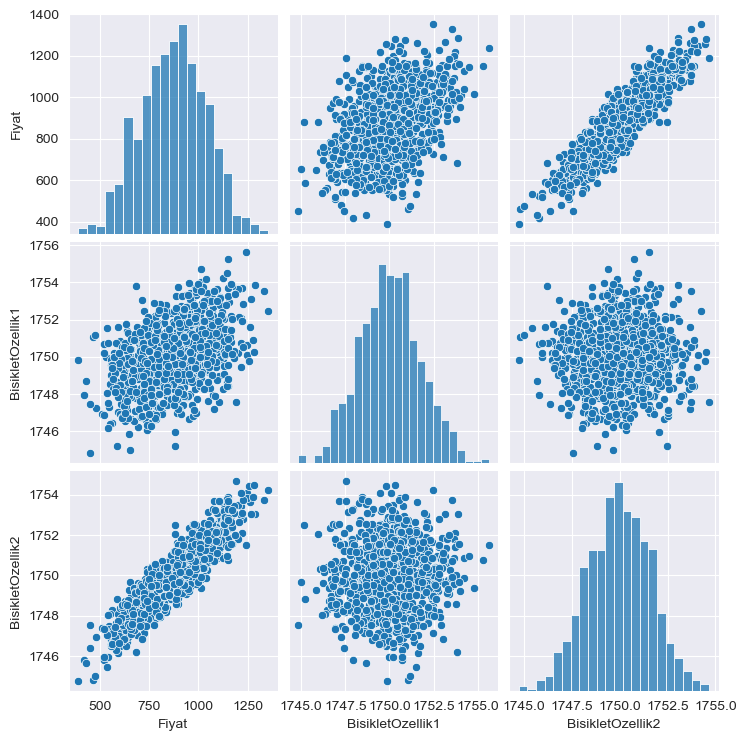

In [7]:
sbn.pairplot(data)

# Data preprocessing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [10]:
data

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [11]:
 #y = wx + b
# y -> label
y = data["Fiyat"].values

# -> feaature
x=data[["BisikletOzellik1","BisikletOzellik2"]].values #pandas listesinden numpy dizii yapmak için .values
# veri bölme
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [12]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [13]:
x_train.shape

(670, 2)

In [14]:
x_test.shape

(330, 2)

In [15]:
y_train.shape

(670,)

In [16]:
y_train

array([ 928.6952754, 1263.961903 ,  539.3910047,  909.0602356,
        827.5599926,  755.0897782,  871.0148095,  987.1951914,
       1072.273843 ,  694.625345 ,  750.4756224,  705.8022573,
        937.9704699,  699.7664082,  836.6511441,  957.4757753,
        692.5542986,  879.9817511, 1083.133861 ,  961.2584546,
        799.7283271,  890.4446699, 1043.475329 ,  581.3983762,
        921.2831591,  904.7251741,  749.7572009,  871.8325006,
        965.3876743, 1055.197693 , 1042.743866 ,  766.9644604,
       1129.98977  ,  775.1337641,  889.7252105,  704.0185578,
        937.2014327,  601.5369815, 1068.018878 ,  864.2491913,
        845.4859474, 1028.047418 ,  659.9882841,  812.2027726,
       1116.252739 ,  862.5282243,  888.309265 ,  781.6579817,
        988.8845581,  908.5516566,  811.7080229,  927.5018276,
        833.1474785, 1026.479661 , 1078.893552 ,  717.4170105,
        885.0577122,  836.6405309,  955.8568831, 1149.145803 ,
        806.2158674,  707.2491908, 1093.736882 ,  720.3

In [17]:
y_test.shape

(330,)

# Creating a model

## scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler() # object created

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train = scaler.transform(x_train)
x_test = scaler.transform((x_test))

In [22]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()

#katmanlar (Dense) /hidden layer on playground
model.add(Dense(4,activation="relu")) #hidden layer 1
model.add(Dense(4,activation="relu")) #hidden layer 2
model.add(Dense(4,activation="relu")) #hidden layer 3

model.add(Dense(1)) #sonuç için bir katman

model.compile(optimizer="rmsprop",loss = "mse") # tüm işlemleri çalışmaya hazır hale getir

# training

In [26]:
model.fit(x_train,y_train,epochs=250) # eğitimi başlat

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795822.1875
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795659.0625
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795504.5625
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 795337.8750
Epoch 5/250
21/21 [==============================] - 0s 781us/step - loss: 795159.3750
Epoch 6/250
21/21 [==============================] - 0s 781us/step - loss: 794966.6250
Epoch 7/250
21/21 [==============================] - 0s 781us/step - loss: 794758.5000
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 794532.6250
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 794289.1250
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 794027.0000
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 793742.5000
Epoch 12/250
21/21 [==============================] - 0s 

In [27]:
loss = model.history.history["loss"]

<AxesSubplot:>

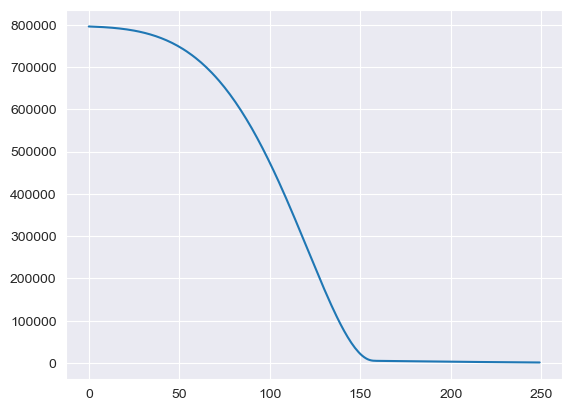

In [28]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [29]:
model.evaluate(x_train,y_train,verbose=0)

1140.918701171875

In [30]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [31]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [32]:
trainLoss

1140.918701171875

In [33]:
testLoss

1127.1826171875

# model değerlendirme

In [34]:
testPredictions = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [35]:
testPredictions

array([[1042.8569 ],
       [ 680.65704],
       [ 883.1772 ],
       [ 887.49347],
       [ 890.0232 ],
       [ 526.4736 ],
       [ 923.5285 ],
       [ 970.0646 ],
       [ 940.83466],
       [ 993.0426 ],
       [ 783.16693],
       [ 921.21735],
       [ 931.612  ],
       [1025.8652 ],
       [1085.3541 ],
       [ 722.5476 ],
       [1074.4834 ],
       [ 690.38116],
       [1095.2692 ],
       [ 891.06964],
       [ 894.01556],
       [ 760.11584],
       [ 553.298  ],
       [ 659.787  ],
       [ 852.2113 ],
       [1057.2286 ],
       [ 748.291  ],
       [ 782.4026 ],
       [ 873.737  ],
       [ 793.97046],
       [ 535.8192 ],
       [ 810.3912 ],
       [ 761.2519 ],
       [ 692.6249 ],
       [ 887.2836 ],
       [ 853.48425],
       [1010.688  ],
       [ 992.307  ],
       [ 858.47174],
       [ 866.5873 ],
       [ 786.70416],
       [1115.1241 ],
       [1058.5043 ],
       [1052.0101 ],
       [ 887.3694 ],
       [ 657.45917],
       [1086.8936 ],
       [ 952.

In [36]:
predictDF = pd.DataFrame(y_test,columns=["Real Y"])

In [37]:
predictDF

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [38]:
predictDF.shape

(330, 1)

In [39]:
testPredictions = pd.Series(testPredictions.reshape(330,))

In [40]:
testPredictions

0      1042.856934
1       680.657043
2       883.177185
3       887.493469
4       890.023193
          ...     
325     993.307739
326     806.804077
327     796.196167
328    1117.476318
329     813.242676
Length: 330, dtype: float32

In [41]:
predictDF = pd.concat([predictDF,testPredictions],axis=1)

In [42]:
predictDF

,Real Y,0
0,1081.652164,1042.856934
1,622.675990,680.657043
2,889.356810,883.177185
3,902.826733,887.493469
4,897.662404,890.023193
...,...,...
325,1028.438035,993.307739
326,789.934950,806.804077
327,758.490486,796.196167
328,1172.871659,1117.476318


In [43]:
predictDF.columns= ["Real Y","Predict Y"]

In [44]:
predictDF

,Real Y,Predict Y
0,1081.652164,1042.856934
1,622.675990,680.657043
2,889.356810,883.177185
3,902.826733,887.493469
4,897.662404,890.023193
...,...,...
325,1028.438035,993.307739
326,789.934950,806.804077
327,758.490486,796.196167
328,1172.871659,1117.476318


<AxesSubplot:xlabel='Real Y', ylabel='Predict Y'>

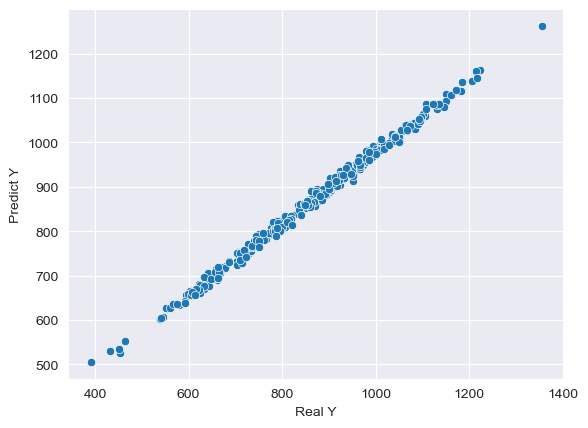

In [45]:
sbn.scatterplot(x="Real Y", y = "Predict Y",data=predictDF)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(predictDF["Real Y"],predictDF["Predict Y"]) #hata

26.628373275694837

In [48]:
mean_squared_error(predictDF["Real Y"],predictDF["Predict Y"])

1127.1826949061015

In [49]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


# model predictions (save)

In [50]:
newData = [[1751,1750]]

In [51]:
newData = scaler.transform(newData)

In [52]:
model.predict(newData)

1/1 [==============================] - 0s 16ms/step


array([[913.9504]], dtype=float32)

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save("bisiklet_modeli.h5") # model save

In [55]:
call = load_model("bisiklet_modeli.h5")

In [56]:
call.predict(newData)

1/1 [==============================] - 0s 62ms/step


array([[913.9504]], dtype=float32)

# Car prices analyzing
learning practise

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [59]:
data = pd.read_excel("merc.xlsx")

In [60]:
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [61]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [62]:
data

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


In [66]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 700x500 with 0 Axes>

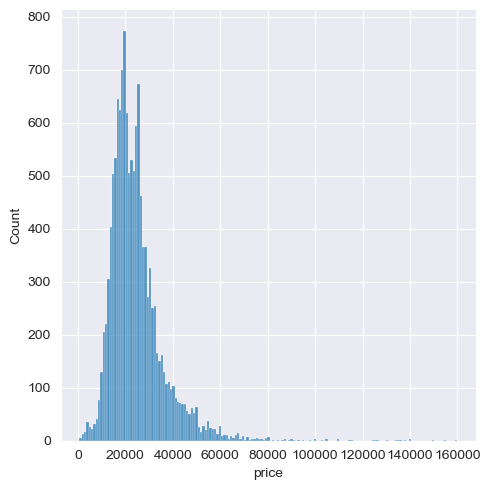

In [69]:
plt.figure(figsize=(7,5))
sbn.displot(data["price"])

<AxesSubplot:>

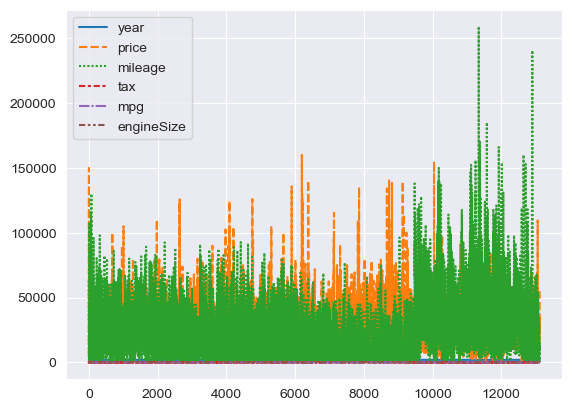

In [70]:
sbn.lineplot(data)

<AxesSubplot:ylabel='count'>

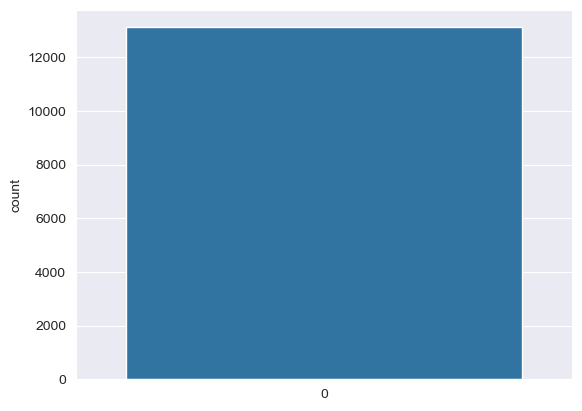

In [74]:
sbn.countplot(data['year'],data=data)

<AxesSubplot:ylabel='count'>

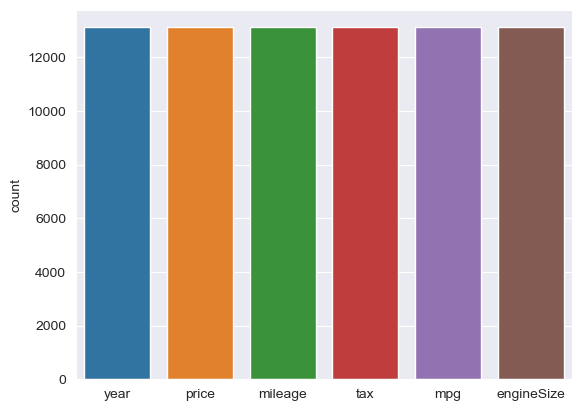

In [76]:
sbn.countplot(data)

In [77]:
data.corr()

C:\Users\furka\AppData\Local\Temp\ipykernel_21836\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [78]:
data.corr()["price"].sort_values()

C:\Users\furka\AppData\Local\Temp\ipykernel_21836\150859749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

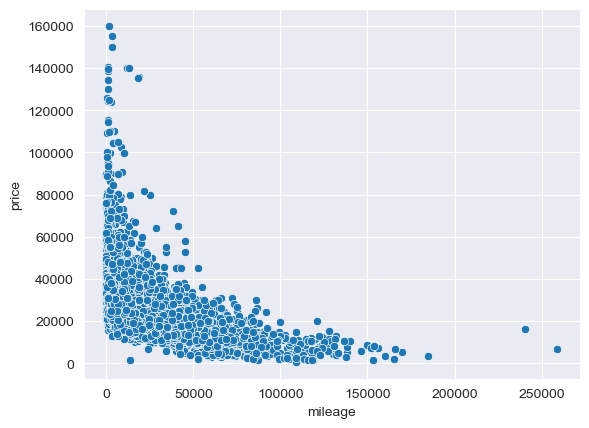

In [79]:
sbn.scatterplot(data,x="mileage",y="price")

In [82]:
data.sort_values("price",ascending=False).head(20) #ascending --> yüksekden aşağı (false için)
#en yüksek fiyatlı 20 araba

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [84]:
data.sort_values("price",ascending=True).head(20) #en ucuz 20

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [85]:
len(data)

13119

In [86]:
len(data)*0.01

131.19

# Data cleaning

In [107]:
data.sort_values("price",ascending= False)

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [108]:
data.sort_values("price",ascending=False).iloc[131:] #en yükek 131 datayı yok ettik

,year,price,mileage,tax,mpg,engineSize
7696,2019,56000,7704,145,29.5,3.0
7919,2019,56000,4957,145,32.5,3.0
12990,2017,55995,7000,145,29.5,5.5
6410,2019,55995,1933,145,40.4,3.0
3594,2019,55995,100,145,52.3,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [109]:
nintyninepercentData = data.sort_values("price",ascending=False).iloc[131:]

<Figure size 700x500 with 0 Axes>

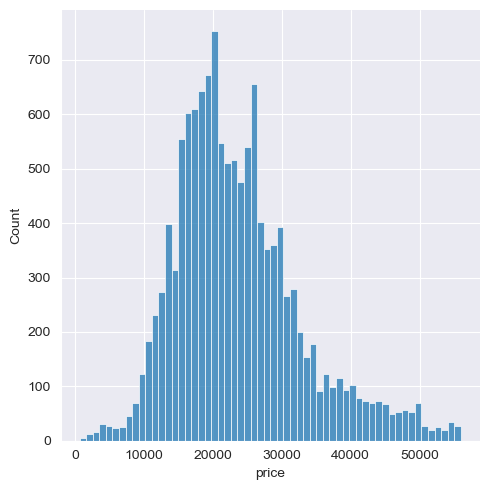

In [110]:
plt.figure(figsize=(7,5))
sbn.displot(nintyninepercentData["price"])

In [111]:
data.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [112]:
nintyninepercentData.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16603.996967
2016    19143.620672
2017    21325.501475
2018    24481.967922
2019    29754.861959
2020    33028.842027
Name: price, dtype: float64

In [113]:
data[data.year != 1970].groupby("year").mean()["price"] # filtreleme

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [114]:
data = nintyninepercentData

In [115]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,12856.000000,12856.000000,12856.000000,12856.000000,12856.000000,12856.000000
mean,2017.268202,23711.110143,22311.166615,129.413892,55.642572,2.037671
std,2.192155,9228.026703,21220.981719,65.196683,14.903440,0.513723
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17280.000000,6548.250000,125.000000,46.300000,1.600000
50%,2018.000000,22136.500000,15606.500000,145.000000,56.500000,2.000000
75%,2019.000000,28480.000000,32133.250000,145.000000,64.200000,2.100000
max,2020.000000,56000.000000,259000.000000,580.000000,217.300000,6.200000


In [116]:
data = data[data.year != 1970]

In [117]:
data.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16603.996967
2016    19143.620672
2017    21325.501475
2018    24481.967922
2019    29754.861959
2020    33028.842027
Name: price, dtype: float64

In [118]:
data.head()

,year,price,mileage,tax,mpg,engineSize
7696,2019,56000,7704,145,29.5,3.0
7919,2019,56000,4957,145,32.5,3.0
12990,2017,55995,7000,145,29.5,5.5
6410,2019,55995,1933,145,40.4,3.0
3594,2019,55995,100,145,52.3,3.0


In [119]:
data = data.drop("transmission",axis=1) #tranmission verisiniatıyoruz

KeyError: "['transmission'] not found in axis"

In [120]:
data

,year,price,mileage,tax,mpg,engineSize
7696,2019,56000,7704,145,29.5,3.0
7919,2019,56000,4957,145,32.5,3.0
12990,2017,55995,7000,145,29.5,5.5
6410,2019,55995,1933,145,40.4,3.0
3594,2019,55995,100,145,52.3,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


## creating a model to examine the data

In [121]:
y = data["price"].values #pandas dizisnin numpy dizisine çevirip verileri alma
x = data.drop("price",axis=1).values

In [123]:
y

array([56000, 56000, 55995, ...,  1490,  1350,   650], dtype=int64)

In [124]:
x

array([[2.01900e+03, 7.70400e+03, 1.45000e+02, 2.95000e+01, 3.00000e+00],
       [2.01900e+03, 4.95700e+03, 1.45000e+02, 3.25000e+01, 3.00000e+00],
       [2.01700e+03, 7.00000e+03, 1.45000e+02, 2.95000e+01, 5.50000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.3,random_state=10)

In [127]:
len(x_train)

8999

In [128]:
len(x_test)

3857

In [129]:
from     sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
x_train = scaler.fit_transform(x_train)

In [132]:
x_test = scaler.transform(x_test)

In [133]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [135]:
x_train.shape # 5 özellik feature var

(8999, 5)

In [136]:
model = Sequential() #model oluşturma

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
# 4 derin ağım var

model.add(Dense(1))  #çıkış katmanı acitivation func girmeye gerek yok
model.compile(optimizer="adam",loss="mse")

In [137]:
model.fit(x=x_train , y=y_train,validation_data=(x_test,y_test), epochs=300,batch_size=250) #bisiklet fiyatları ile manuel yaptığımız işlemleri validation ile otomatize ediyoruz
# batch_size ile modele parça parça veri veirliyor

Epoch 1/300
36/36 [==============================] - 1s 7ms/step - loss: 642957376.0000 - val_loss: 657632896.0000
Epoch 2/300
36/36 [==============================] - 0s 2ms/step - loss: 642936640.0000 - val_loss: 657598336.0000
Epoch 3/300
36/36 [==============================] - 0s 2ms/step - loss: 642873600.0000 - val_loss: 657492032.0000
Epoch 4/300
36/36 [==============================] - 0s 2ms/step - loss: 642695488.0000 - val_loss: 657204992.0000
Epoch 5/300
36/36 [==============================] - 0s 2ms/step - loss: 642245760.0000 - val_loss: 656529408.0000
Epoch 6/300
36/36 [==============================] - 0s 2ms/step - loss: 641247104.0000 - val_loss: 655058304.0000
Epoch 7/300
36/36 [==============================] - 0s 2ms/step - loss: 639131200.0000 - val_loss: 652067776.0000
Epoch 8/300
36/36 [==============================] - 0s 2ms/step - loss: 635067904.0000 - val_loss: 646543168.0000
Epoch 9/300
36/36 [==============================] - 0s 2ms/step - loss: 6278944

# Making inference from data

In [138]:
lossData = pd.DataFrame(model.history.history)

In [139]:
lossData.head()

,loss,val_loss
0,642957376.0,657632896.0
1,642936640.0,657598336.0
2,642873600.0,657492032.0
3,642695488.0,657204992.0
4,642245760.0,656529408.0


<AxesSubplot:>

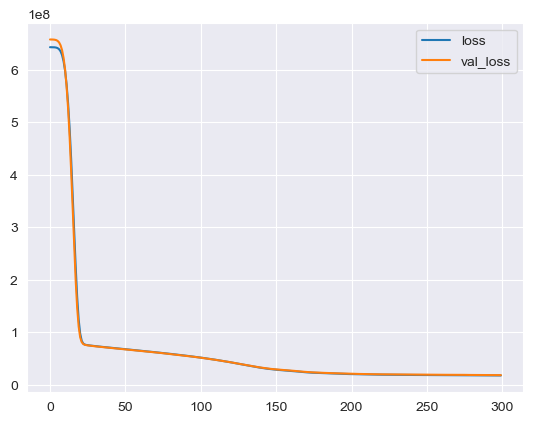

In [141]:
lossData.plot() #epochs fazla olursa overfitting problemi verilebilir

In [142]:
#oldukça normal bir tablo başarılı bir model

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [146]:
predictionsArray = model.predict(x_test)

121/121 [==============================] - 0s 1ms/step


In [147]:
predictionsArray

array([[27771.316],
       [27630.465],
       [28312.27 ],
       ...,
       [20577.81 ],
       [22825.854],
       [24936.64 ]], dtype=float32)

In [150]:
mean_absolute_error(y_test,predictionsArray) #3127 pound sapma payı var denilebilir

3127.7713864528982

In [151]:
data.describe

<bound method NDFrame.describe of        year  price  mileage  tax   mpg  engineSize
7696   2019  56000     7704  145  29.5         3.0
7919   2019  56000     4957  145  32.5         3.0
12990  2017  55995     7000  145  29.5         5.5
6410   2019  55995     1933  145  40.4         3.0
3594   2019  55995      100  145  52.3         3.0
...     ...    ...      ...  ...   ...         ...
11549  2002   1495    13800  305  39.8         2.7
12594  2004   1495   119000  300  34.5         1.8
11765  2000   1490    87000  265  27.2         3.2
12008  2010   1350   116126  145  54.3         2.0
11816  2003    650   109090  235  40.0         1.4

[12856 rows x 6 columns]>

In [152]:
#veriyi düzeltebiliriz,ipohcs artırabiliriz,nöron ve katman sayısı ile oynanığ daha iyi sonuç alabiliriz

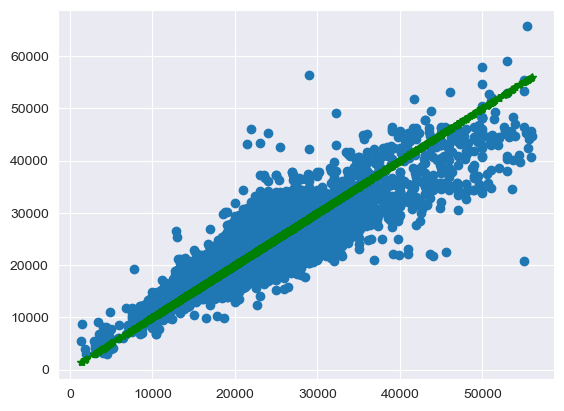

In [155]:
plt.scatter(y_test,predictionsArray)
plt.plot(y_test,y_test,"g-*") #regresyon çizgisi

In [156]:
data.iloc[2]

year           2017.0
price         55995.0
mileage        7000.0
tax             145.0
mpg              29.5
engineSize        5.5
Name: 12990, dtype: float64

In [160]:
newCarSeries = data.drop("price",axis=1).iloc[2]

In [161]:
newCarSeries

year          2017.0
mileage       7000.0
tax            145.0
mpg             29.5
engineSize       5.5
Name: 12990, dtype: float64

In [162]:
type(newCarSeries)

pandas.core.series.Series

In [163]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,5)  )

In [164]:
model.predict(newCarSeries)

1/1 [==============================] - 0s 22ms/step


array([[62266.65]], dtype=float32)

# tensorflow classification problems

In [168]:
import pandas as pd
import numpy as np

In [170]:
data = pd.read_excel("maliciousornot.xlsx")

In [171]:
data

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [173]:
data.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [175]:
data.corr()["Type"].sort_values

<bound method Series.sort_values of Type                         1.000000
URL_LENGTH                  -0.228422
NUMBER_SPECIAL_CHARACTERS    0.412095
TCP_CONVERSATION_EXCHANGE    0.744570
DIST_REMOTE_TCP_PORT         0.710294
REMOTE_IPS                   0.126232
APP_BYTES                    0.096659
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_APP_BYTES            -0.086080
REMOTE_APP_BYTES            -0.048806
APP_PACKETS                  0.240818
DNS_QUERY_TIMES             -0.011055
SOURCE_A                     0.536539
SOURCE_B                    -0.128587
SOURCE_C                    -0.075369
SOURCE_D                     0.029479
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_G                    -0.017433
SOURCE_H                     0.055045
SOURCE_I                    -0.138708
SOURCE_J                     0.453197
SOURCE_K                     0.784173
SOURCE_M                     0.734002
SOURCE_L      

In [176]:
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:xlabel='Type', ylabel='count'>

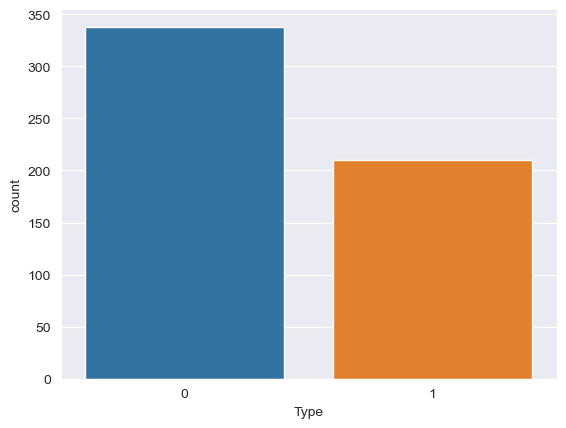

In [177]:
sbn.countplot(x="Type",data=data)

<AxesSubplot:>

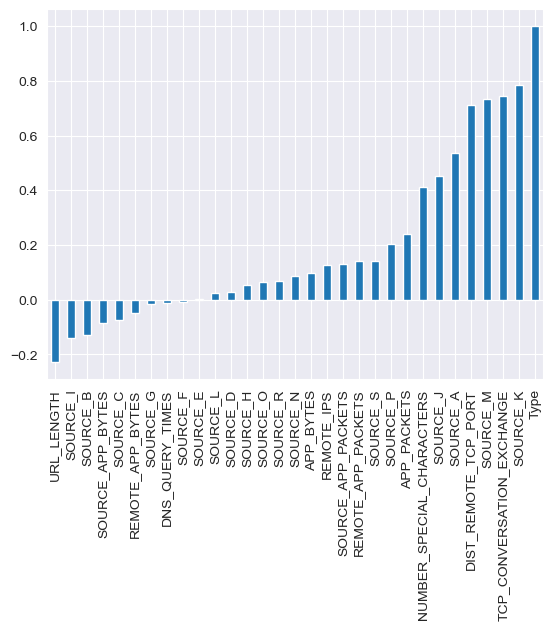

In [178]:
data.corr()["Type"].sort_values().plot(kind="bar")

In [180]:
y = data["Type"].values
x=data.drop("Type",axis=1).values

In [181]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [182]:
x

array([[2.33030467e+01, 1.34455600e+01, 1.59066933e+02, ...,
        3.43781467e-01, 5.95982867e-01, 1.54015133e-01],
       [2.66450067e+01, 2.30180733e+01, 1.72149800e+02, ...,
        2.40932000e+02, 3.56216667e+02, 1.15310573e-01],
       [2.55051133e+01, 2.75258333e+01, 1.68393333e+02, ...,
        3.14766000e+02, 4.68003933e-01, 1.13445293e-01],
       ...,
       [2.15025333e+01, 3.63729600e+01, 1.40284600e+02, ...,
        1.83678267e-01, 2.87304933e-01, 1.01295067e-01],
       [2.66838667e+01, 3.79921267e+01, 1.81476200e+02, ...,
        3.43263333e+02, 5.29402733e-01, 1.60621333e+02],
       [1.00517867e+01, 3.17874800e+01, 6.20723733e+01, ...,
        0.00000000e+00, 3.71890200e-01, 9.11785133e-02]])

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = MinMaxScaler()

In [187]:
scaler.fit(x_train)

MinMaxScaler()

In [188]:
x_train = scaler.transform(x_train)

In [189]:
x_test = scaler.transform(x_test)

In [194]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [195]:
x_train.shape

(383, 30)

In [197]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [198]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 19ms/step - loss: 0.6885 - val_loss: 0.6807
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6726 - val_loss: 0.6696
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6567 - val_loss: 0.6548
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6361 - val_loss: 0.6328
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6109 - val_loss: 0.6113
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5780 - val_loss: 0.5749
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5381 - val_loss: 0.5368
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4931 - val_loss: 0.4985
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4461 - val_loss: 0.4633
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4021 - val_loss: 0.4206
Epoch 11

# early stopping

In [199]:
model.history.history

{'loss': [0.6884865760803223,
  0.6725530028343201,
  0.6566964387893677,
  0.6361083984375,
  0.6109291911125183,
  0.5779526829719543,
  0.5381165146827698,
  0.4931311011314392,
  0.4461350440979004,
  0.40207916498184204,
  0.358549028635025,
  0.32120898365974426,
  0.28759685158729553,
  0.25798705220222473,
  0.23122844099998474,
  0.2111603021621704,
  0.1945696622133255,
  0.18022438883781433,
  0.16902881860733032,
  0.15751783549785614,
  0.15072417259216309,
  0.14517901837825775,
  0.1366826891899109,
  0.13285644352436066,
  0.13107003271579742,
  0.12258593738079071,
  0.11823000758886337,
  0.11467069387435913,
  0.11209793388843536,
  0.10939167439937592,
  0.10635308176279068,
  0.10276643186807632,
  0.09905041009187698,
  0.09622006118297577,
  0.09485003352165222,
  0.09274449199438095,
  0.08945237845182419,
  0.09020833671092987,
  0.08890283107757568,
  0.08648864924907684,
  0.08078892529010773,
  0.08052260428667068,
  0.07945895940065384,
  0.0779054835438728

In [201]:
lossData = pd.DataFrame(model.history.history)

<AxesSubplot:>

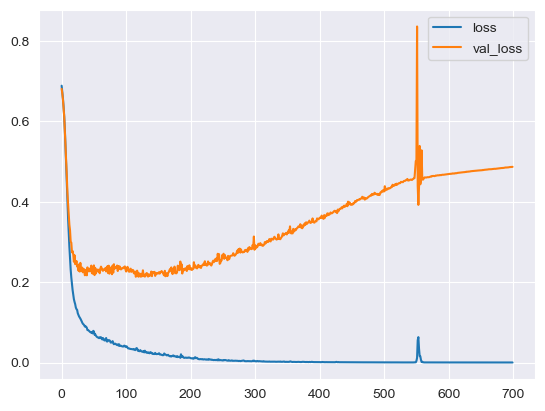

In [202]:
lossData.plot()

In [203]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [204]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [205]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 17ms/step - loss: 0.6921 - val_loss: 0.6821
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6793 - val_loss: 0.6713
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6633 - val_loss: 0.6566
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6425 - val_loss: 0.6346
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6148 - val_loss: 0.6020
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5777 - val_loss: 0.5627
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5361 - val_loss: 0.5199
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4882 - val_loss: 0.4850
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4408 - val_loss: 0.4457
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3943 - val_loss: 0.4087
Epoch 11

In [206]:
lossData = pd.DataFrame(model.history.history)

<AxesSubplot:>

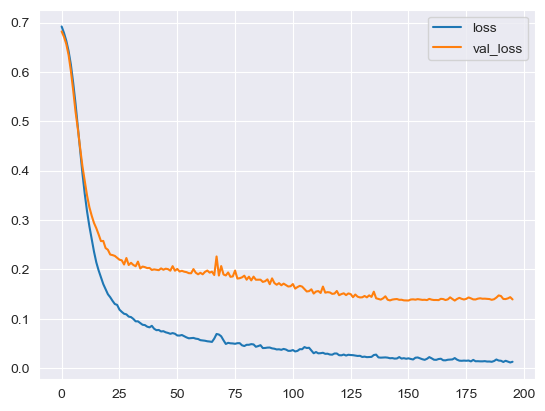

In [207]:
lossData.plot()

# dropout layers

In [215]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid")) #tek unit olduğu için koymaya gerek yok (dropout)

model.compile(loss="binary_crossentropy",optimizer="adam")

In [216]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 19ms/step - loss: 0.7264 - val_loss: 0.6912
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 0.6900
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6913 - val_loss: 0.6889
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6820 - val_loss: 0.6874
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6744 - val_loss: 0.6856
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6767 - val_loss: 0.6834
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6647 - val_loss: 0.6813
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6794
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6719 - val_loss: 0.6771
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6540 - val_loss: 0.6755
Epoch 11

In [217]:
lossData = pd.DataFrame(model.history.history)

<AxesSubplot:>

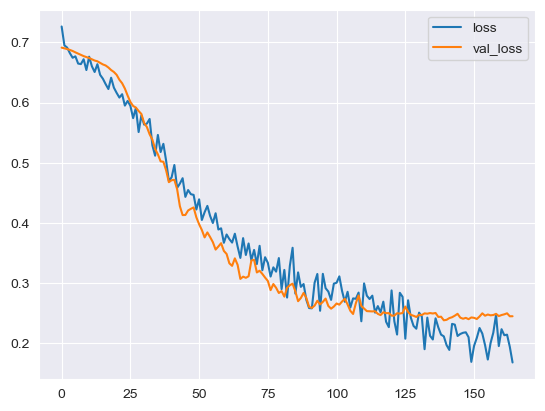

In [218]:
lossData.plot()

In [237]:
ourpredictions = np.argmax(model.predict(x_test), axis=-1)

6/6 [==============================] - 0s 0s/step


In [231]:
from sklearn.metrics import classification_report,confusion_matrix

In [240]:
print(classification_report(y_test,ourpredictions))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



C:\Users\furka\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\furka\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\furka\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
print(confusion_matrix(y_test,ourpredictions))

[[91  0]
 [74  0]]
